### Movie Lens Dataset
Data from Movie Lens are used to cluster movies into different groups based on genre.

In [1]:
movies = read.csv("movies.txt", header=FALSE, sep="|", quote="\"")

In [3]:
colnames(movies)=c("ID","Title","ReleaseDate","VideoReleaseDate","IMDB","Unknown","Action","Adventure","Animation","Childrens",
              "Comedy","Crime","Documentary","Drama","Fantasy","FilmNoir","Horror","Musical","Mystery","Romance",
               "SciFi","Thriller","War","Western")

In [5]:
movies$ID=NULL
movies$ReleaseDate=NULL
movies$VideoReleaseDate=NULL
movies$IMDB=NULL

In [6]:
movies=unique(movies)

In [7]:
str(movies)

'data.frame':	1664 obs. of  20 variables:
 $ Title      : Factor w/ 1664 levels "'Til There Was You (1997)",..: 1525 618 555 594 344 1318 1545 111 391 1240 ...
 $ Unknown    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Action     : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Adventure  : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Childrens  : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 0 1 0 0 0 1 0 0 ...
 $ Crime      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 1 1 1 1 1 1 ...
 $ Fantasy    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ FilmNoir   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SciFi      : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Thriller   : int  0 1 1 0 1 0 0 0 0 0 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Western    : int  0 0 0 0 0

In [8]:
distance=dist(movies[2:20],method='euclidean')

In [9]:
clusterMovies=hclust(distance,method='ward.D')

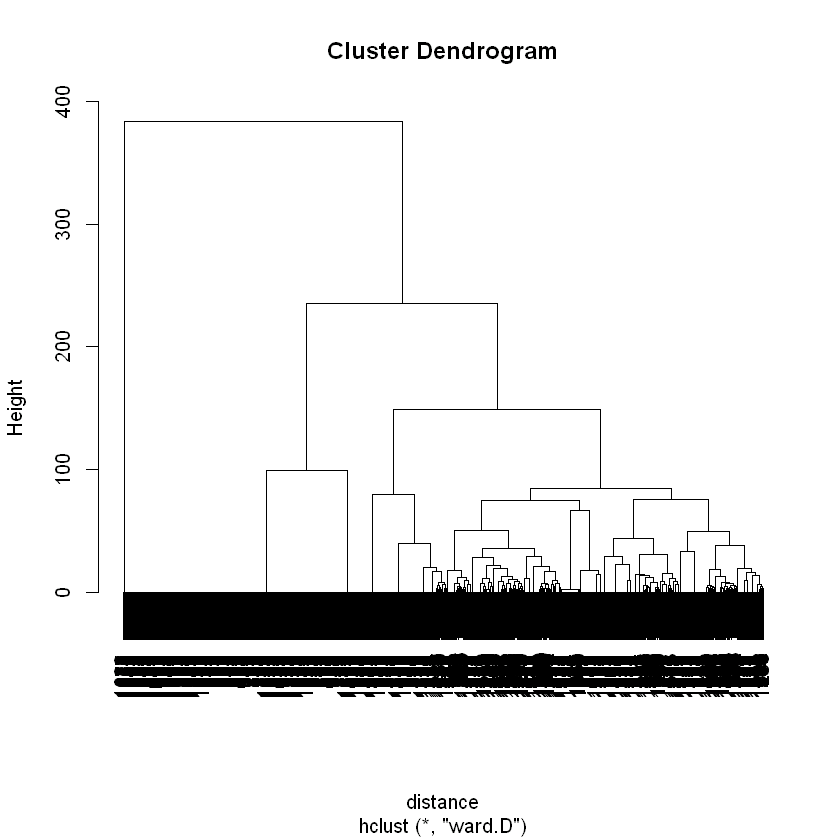

In [10]:
# create a dendrogram for movies
plot(clusterMovies)

In [11]:
clusterGroups=cutree(clusterMovies,k=10)

In [13]:
tapply(movies$Action,clusterGroups,mean)

ERROR: Error in dn[[2L]]: subscript out of bounds


1         2         3         4         5         6         7         8 
0.1784512 0.7839196 0.1238532 0.0000000 0.0000000 0.1015625 0.0000000 0.0000000 
        9        10 
0.0000000 0.0000000

In [14]:
tapply(movies$Romance,clusterGroups,mean)

ERROR: Error in dn[[2L]]: subscript out of bounds


1          2          3          4          5          6          7 
0.10437710 0.04522613 0.03669725 0.00000000 0.00000000 1.00000000 1.00000000 
         8          9         10 
0.00000000 0.00000000 0.00000000

In [15]:
subset(movies,Title=="Seven (Se7en) (1995)")

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
11,Seven (Se7en) (1995),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
clusterGroups[11]

11 
 3

In [17]:
cluster3=subset(movies,clusterGroups==3)

In [18]:
# displays movies that are in the same cluster group as Seven
cluster3$Title[1:10]

[1] Four Rooms (1995)          Copycat (1995)            
 [3] Seven (Se7en) (1995)       Usual Suspects, The (1995)
 [5] From Dusk Till Dawn (1996) Taxi Driver (1976)        
 [7] Rumble in the Bronx (1995) Batman Forever (1995)     
 [9] Strange Days (1995)        Disclosure (1994)         
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)